In [27]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

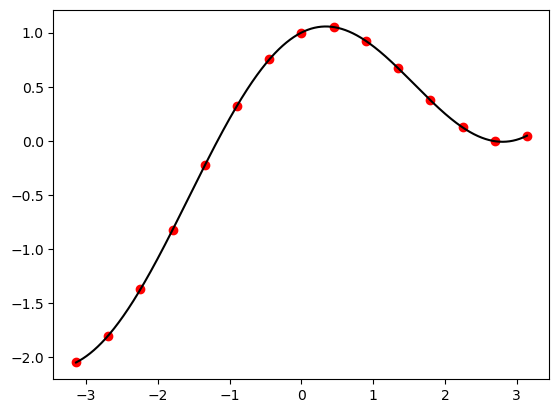

In [39]:
X_sample = np.linspace(-np.pi, np.pi, 15)
Y_true_sample = X_sample / 3 + np.cos(X_sample)

X_full = np.linspace(-np.pi, np.pi, 10001)
Y_true_full = X_full / 3 + np.cos(X_full)

plt.plot(X_full, Y_true_full, color='black')
plt.scatter(X_sample, Y_true_sample, color='red')

In [50]:
def plot_unbiased(n: int) -> None:
    poly_n = PolynomialFeatures(degree=n)
    X_sample_poly_n = poly_n.fit_transform(X_sample.reshape(-1,1))
    X_full_poly_n = poly_n.fit_transform(X_full.reshape(-1,1))
    lin = LinearRegression().fit(X_sample_poly_n, Y_true_sample)
    Y_pred_full = lin.predict(X_full_poly_n)
    plt.plot(X_full, Y_true_full, color='black')
    plt.scatter(X_sample, Y_true_sample, color='red')
    plt.plot(X_full, Y_pred_full, color='blue')

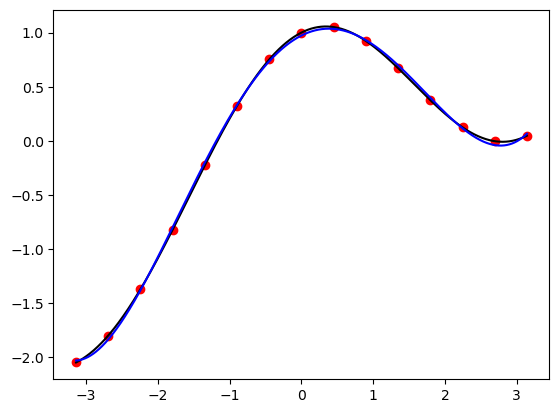

In [51]:
plot_unbiased(5)

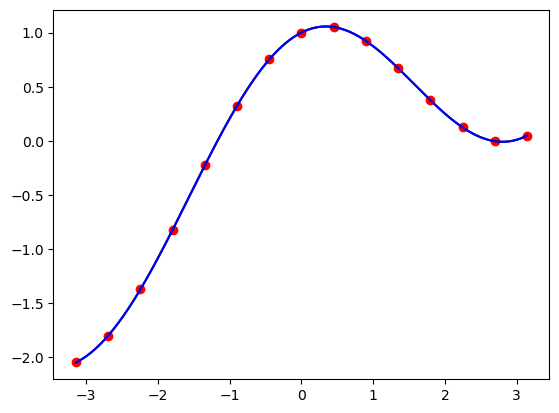

In [52]:
plot_unbiased(10)

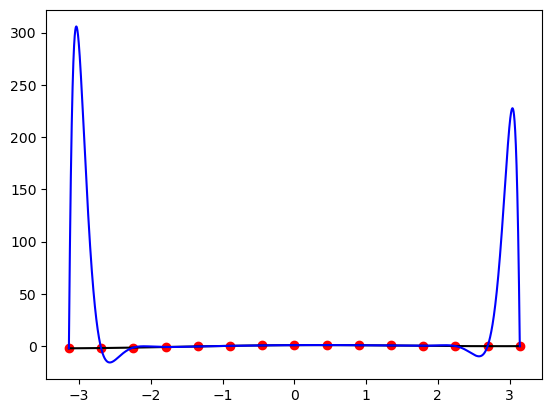

In [53]:
plot_unbiased(20)

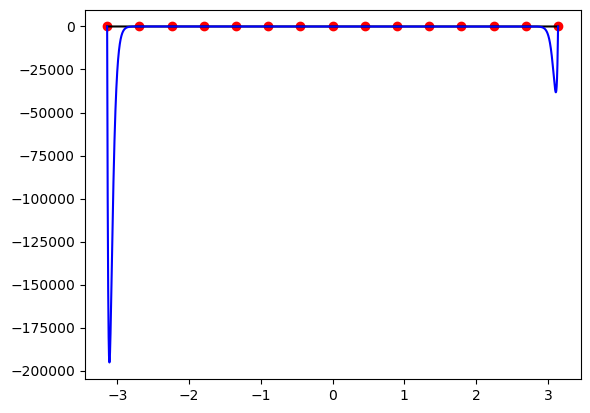

In [54]:
plot_unbiased(100)

In [ ]:
def plot_biased(n: int) -> None:
    poly_n = PolynomialFeatures(degree=n)
    X_sample_poly_n = poly_n.fit_transform(X_sample.reshape(-1,1))
    X_full_poly_n = poly_n.fit_transform(X_full.reshape(-1,1))
    lin = LinearRegression().fit(X_sample_poly_n, Y_true_sample)
    Y_pred_full = lin.predict(X_full_poly_n)
    plt.plot(X_full, Y_true_full, color='black')
    plt.scatter(X_sample, Y_true_sample, color='red')
    plt.plot(X_full, Y_pred_full, color='blue')